### Importing necessary library

In [1]:
import pandas as pd
import numpy as np

import datetime

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

import joblib

### Define global settings

In [2]:
pd.options.display.float_format = '{:.6f}'.format

### Features to keep

In [3]:
kbest_30 = ['latitude', 'longitude', 'beds', 'baths', 'sq_feet', 'lease_term_6 months',
 'lease_term_Negotiable', 'lease_term_Short Term', 'type_Basement',
 'type_Condo Unit', 'type_House', 'type_Room For Rent',
 'smoking_Smoking Allowed', 'province_British Columbia', 'province_Manitoba',
 'province_Newfoundland and Labrador', 'province_Nova Scotia',
 'province_Ontario', 'province_Quebec', 'province_Saskatchewan',
 'city_Calgary', 'city_Toronto', 'city_Edmonton', 'city_Montréal',
 'city_Ottawa', 'city_Winnipeg', 'city_Vancouver', 'city_Victoria',
 'city_Regina', 'city_West Vancouver']


### Create dataframe

In [4]:
# Separate independent variable from dependent variable
#X = pd.DataFrame(columns = kbest_30, index = list(range(0,5)))
y = pd.DataFrame(columns = ['price'], index = list(range(0,5)))

### Load the model


In [5]:
# Load the model and preprocessors (if saved)
model = joblib.load("best_model_polynomial_degree2_kbest30.joblib")
converter = joblib.load("best_model_polynomial_degree2_kbest30_converter.joblib")
scaler = joblib.load("best_model_polynomial_degree2_kbest30_scaler.joblib")

In [6]:
price = [
    2000,
    1450,
    2695,
    1985,
    1799,
]

In [7]:
#https://www.rentfaster.ca/ab/edmonton/rentals/townhouse/3-bedrooms/king-edward-park/pet-friendly/606335
add1 = [53.516854400000,113.463416100000, 3,2.5, 1150, 0,0,0 ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0 ]
#https://www.rentfaster.ca/ab/calgary/rentals/basement/1-bedroom/banff-trail/pet-friendly/540714
add2 = [51.078215700000,114.118240800000, 1,1, 485, 0,1,0 ,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0 ]
# https://www.rentfaster.ca/bc/vancouver/rentals/apartment/1-bedroom/west-end/pet-friendly/579375?-RSYNCabs
add3 = [49.287549139051,123.14036503577, 1,1, 447, 0,0,0 ,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0 ]
# https://www.rentfaster.ca/on/ottawa/rentals/apartment/1-bedroom/byward-market/pet-friendly/559539?-RSYNC
add4 = [45.428845500000,75.686676400000, 1,1, 649, 0,0,0 ,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0 ]
# https://www.rentfaster.ca/qc/quebec/rentals/apartment/2-bedrooms/non-smoking/315473?-RSYNC
add5 = [46.793479300000,71.235082600000, 2,1, 950, 0,0,0 ,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0 ]
len(add5)

30

In [8]:

X = pd.concat([pd.DataFrame(dict(zip(kbest_30, add1)), index=[0]),
               pd.DataFrame(dict(zip(kbest_30, add2)), index=[1]),
               pd.DataFrame(dict(zip(kbest_30, add3)), index=[2]),
               pd.DataFrame(dict(zip(kbest_30, add4)), index=[3]),
               pd.DataFrame(dict(zip(kbest_30, add5)), index=[4]),
              ])


In [9]:
X.iloc[3]

latitude                              45.428846
longitude                             75.686676
beds                                   1.000000
baths                                  1.000000
sq_feet                              649.000000
lease_term_6 months                    0.000000
lease_term_Negotiable                  0.000000
lease_term_Short Term                  0.000000
type_Basement                          0.000000
type_Condo Unit                        1.000000
type_House                             0.000000
type_Room For Rent                     0.000000
smoking_Smoking Allowed                0.000000
province_British Columbia              0.000000
province_Manitoba                      0.000000
province_Newfoundland and Labrador     0.000000
province_Nova Scotia                   0.000000
province_Ontario                       1.000000
province_Quebec                        0.000000
province_Saskatchewan                  0.000000
city_Calgary                           0

In [10]:
X.columns

Index(['latitude', 'longitude', 'beds', 'baths', 'sq_feet',
       'lease_term_6 months', 'lease_term_Negotiable', 'lease_term_Short Term',
       'type_Basement', 'type_Condo Unit', 'type_House', 'type_Room For Rent',
       'smoking_Smoking Allowed', 'province_British Columbia',
       'province_Manitoba', 'province_Newfoundland and Labrador',
       'province_Nova Scotia', 'province_Ontario', 'province_Quebec',
       'province_Saskatchewan', 'city_Calgary', 'city_Toronto',
       'city_Edmonton', 'city_Montréal', 'city_Ottawa', 'city_Winnipeg',
       'city_Vancouver', 'city_Victoria', 'city_Regina',
       'city_West Vancouver'],
      dtype='object')

In [11]:
kbest_30 = ['latitude', 'longitude', 'beds', 'baths', 'sq_feet', 'lease_term_6 months',
 'lease_term_Negotiable', 'lease_term_Short Term', 'type_Basement',
 'type_Condo Unit', 'type_House', 'type_Room For Rent',
 'smoking_Smoking Allowed', 'province_British Columbia', 'province_Manitoba',
 'province_Newfoundland and Labrador', 'province_Nova Scotia',
 'province_Ontario', 'province_Quebec', 'province_Saskatchewan',
 'city_Calgary', 'city_Toronto', 'city_Edmonton', 'city_Montréal',
 'city_Ottawa', 'city_Winnipeg', 'city_Vancouver', 'city_Victoria',
 'city_Regina', 'city_West Vancouver']


In [12]:
# Transform and scale the new data
new_data_poly = converter.transform(X)
new_data_poly_scaled = scaler.transform(new_data_poly)

# Make predictions
prediction = model.predict(new_data_poly_scaled)
print("Predicted price:", prediction)

Predicted price: [2221.98549831 1461.05463461 2715.19088823 2269.74765864 1845.46210163]


In [32]:
print(price - prediction)
mae = mean_absolute_error(price, prediction)

mse = mean_squared_error(price, prediction)

rmse = np.sqrt(mse)

print(f'The Mean Absolute Error = {mae:.0f}\n\
The Mean Square Error = {mse:.0f}\n\
The Root Mean Square Error = {rmse:.2f}\n\n')

[-221.98549831  -11.05463461  -20.19088823 -284.74765864  -46.46210163]
The Mean Absolute Error = 117
The Mean Square Error = 26609
The Root Mean Square Error = 163.12




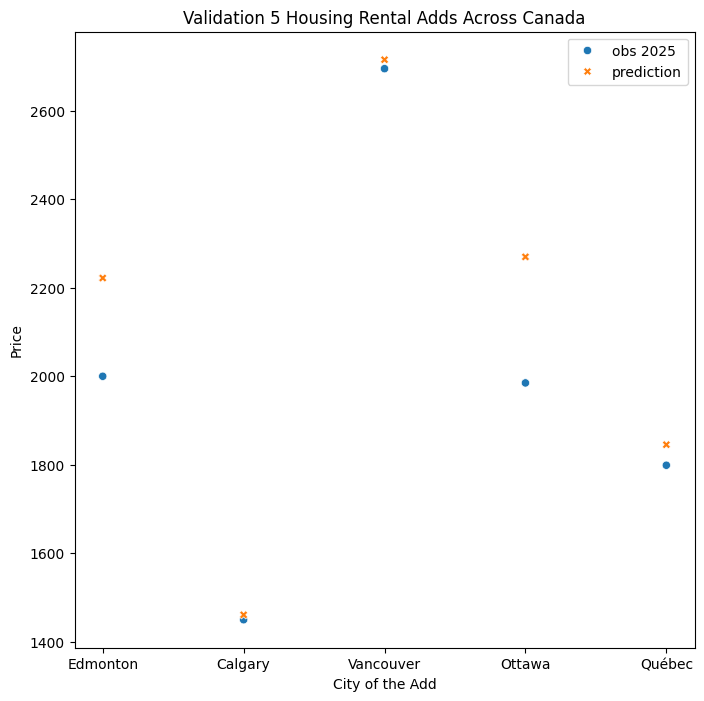

In [31]:
y_true  = pd.DataFrame(dict(zip([0,1,2,3,4],price)), index=[0]).transpose().rename(columns = {0:'obs 2025'})
y_fcst  = pd.DataFrame(dict(zip([0,1,2,3,4],prediction)), index=[0]).transpose().rename(columns = {0:'prediction'})

y_new = y_true.join(y_fcst).rename(index={0:'Edmonton',1:'Calgary',2:'Vancouver',3:'Ottawa',4:'Québec'})
# Create figure and adjust size
plt.figure(figsize = (8, 8))

# Add scatter plot
ax = sns.scatterplot(y_new)

# Set title
ax.set_title('Validation 5 Housing Rental Adds Across Canada')

# Adjust the axis label
ax.set(xlabel='City of the Add', ylabel='Price')


plt.savefig('../Graph/5_cases_validation_2025.png')

In [15]:
dict(zip([0,1,2,3,4],price))

pd.DataFrame(dict(zip([0,1,2,3,4],price)), index=[0]).transpose()

,0
0,2000
1,1450
2,2695
3,1985
4,1799


In [16]:
pd.DataFrame(dict(zip([0,1,2,3,4],prediction)), index=[0]).transpose()

,0
0,2221.985498
1,1461.054635
2,2715.190888
3,2269.747659
4,1845.462102
